In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [69]:
import zipfile
with zipfile.ZipFile('/kaggle/input/whats-cooking/train.json.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/')

In [70]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
with open('/kaggle/working/train.json') as f:
    json_data = json.load(f)

In [72]:
json_data[0]

{'id': 10259,
 'cuisine': 'greek',
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

In [73]:
df = pd.DataFrame()

In [74]:
for i,row in enumerate(json_data):
    df.loc[i,'cuisine'] = row['cuisine']
    df.loc[i,'ingrediants'] = str(row['ingredients'])

In [75]:
df.to_csv('cuisine.csv',index=False)

In [76]:
df = pd.read_csv('/kaggle/working/cuisine.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cuisine      39774 non-null  object
 1   ingrediants  39774 non-null  object
dtypes: object(2)
memory usage: 621.6+ KB


In [78]:
df.isnull().sum()

cuisine        0
ingrediants    0
dtype: int64

In [79]:
df.duplicated().sum()

97

In [80]:
df

,cuisine,ingrediants
0,greek,"['romaine lettuce', 'black olives', 'grape tom..."
1,southern_us,"['plain flour', 'ground pepper', 'salt', 'toma..."
2,filipino,"['eggs', 'pepper', 'salt', 'mayonaise', 'cooki..."
3,indian,"['water', 'vegetable oil', 'wheat', 'salt']"
4,indian,"['black pepper', 'shallots', 'cornflour', 'cay..."
...,...,...
39769,irish,"['light brown sugar', 'granulated sugar', 'but..."
39770,italian,"['KRAFT Zesty Italian Dressing', 'purple onion..."
39771,irish,"['eggs', 'citrus fruit', 'raisins', 'sourdough..."
39772,chinese,"['boneless chicken skinless thigh', 'minced ga..."


In [81]:
df.drop_duplicates(inplace=True)

In [82]:
df.reset_index(drop=True,inplace=True)

In [83]:
# Unique cuisine
df['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [84]:
df['cuisine'].value_counts()

cuisine
italian         7831
mexican         6429
southern_us     4299
indian          2997
chinese         2666
french          2637
cajun_creole    1541
thai            1536
japanese        1417
greek           1172
spanish          987
korean           827
vietnamese       821
moroccan         818
british          803
filipino         755
irish            667
jamaican         522
russian          489
brazilian        463
Name: count, dtype: int64

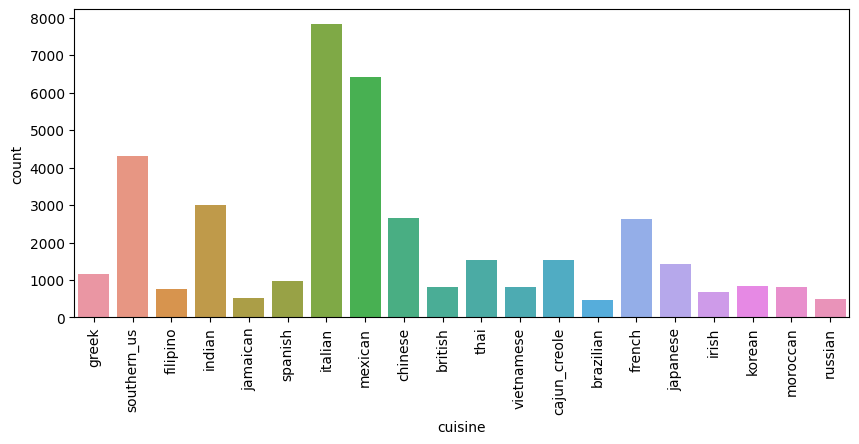

In [85]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['cuisine'])
plt.xticks(rotation='vertical')
plt.show()

In [86]:
df['ingrediants'] = df['ingrediants'].apply(lambda x:x.strip("[]").split(','))

In [87]:
df['ingrediants'] = df['ingrediants'].apply(lambda x:[i.replace("'",'') for i in x])

In [88]:
df['ingrediants'] = df['ingrediants'].apply(lambda x:[i.replace(" ",'') for i in x])

In [89]:
df.explode('ingrediants')['ingrediants'].value_counts()

ingrediants
salt                      18004
onions                     7961
oliveoil                   7955
water                      7441
garlic                     7370
                          ...  
frozenfruit                   1
sauerkrautjuice               1
no-caloriesweetener           1
BobEvansItalianSausage        1
crushedcheesecrackers         1
Name: count, Length: 6692, dtype: int64

In [90]:
df['ingrediants'] = df['ingrediants'].apply(lambda x:' '.join(x))

In [91]:
cv_vec = CountVectorizer(min_df=20)

In [92]:
text_vector = pd.DataFrame(cv_vec.fit_transform(df['ingrediants']).toarray(),columns=cv_vec.vocabulary_.keys())

In [93]:
final_df = pd.concat([df,text_vector],axis=1)
final_df.drop('ingrediants',axis=1,inplace=True)
final_df.head()

,cuisine,romainelettuce,blackolives,grapetomatoes,garlic,pepper,purpleonion,seasoning,garbanzobeans,fetacheesecrumbles,...,butteroil,puremaplesyrup,wholepeppercorn,fullfatcoconutmilk,pimentostuffedolives,bananaleaves,irishcreamliqueur,pepperoncini,burgundywine,wildrice
0,greek,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [95]:
X.head()

,romainelettuce,blackolives,grapetomatoes,garlic,pepper,purpleonion,seasoning,garbanzobeans,fetacheesecrumbles,plainflour,...,butteroil,puremaplesyrup,wholepeppercorn,fullfatcoconutmilk,pimentostuffedolives,bananaleaves,irishcreamliqueur,pepperoncini,burgundywine,wildrice
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
y.head()

0          greek
1    southern_us
2       filipino
3         indian
4         indian
Name: cuisine, dtype: object

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [102]:
# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB,ComplementNB,MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier


In [103]:
model = GradientBoostingClassifier()

In [ ]:
cross_val_score(model,X,y,verbose=True,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 66.0min finished


array([0.75214214, 0.75642641, 0.75198488, 0.74770006, 0.75752993])

In [ ]:
model = ComplementNB()
cross_val_score(model,X,y,verbose=True,n_job s=-1)  